In [123]:
import pandas as pd
import numpy as np
from string import punctuation
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import seaborn as sns
import nltk
import collections


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import yake

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import model_selection, preprocessing, linear_model, metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score




In [ ]:
'''This notebook contains several text analysis techniques each used for different purposes:

1. Basic data exploration on features(scores, bank, devices,... except Translated comment) 
2. Text exploration on "Translated comment" column
3. Text classification (to classify the opinionpolarity(positive, negative, neutral)). 
4. Evaluation the ML models
5. keyword extraction'''

In [ ]:
'''1. Basic Data exploration:
      Loading the data: Converting dataset file from xlsx to csv file, it can be easy to access. Dataset consist of 7 features 
      (date, score, Translated comment, Original comment, externalId, bank country and device). The first step consist of 
      statistic analysis on dataset to get a vision about data.
      '''

In [ ]:
'''2. Text exploration:
      Customers of a bank leave their opinions. Their comments presented in Translated comment column of dataset. In this step
      several statistics analysis will be done on the text variable (Translated comment). This analysis consist of counting the 
      number of words, number of questions, number of links, number of emoji...in each class. 
      Moreover I will check the frequency and importance of words by visualization by wordcloud and seaborn library.
      
      Data cleaning:
      A class that is termed clean_tex is defined to clean data. This class consists of several functions to remove punctuations
      , stopwords, emoji, uppercase words, and stemming process.
      
      '''

In [ ]:
'''3. Text classification:
      I will use sentiment analysis to classify the opinion polarity (positive, negative, neutral). For this step, I will use 
      the TextBlob library. I will use four Ml models to classify data and compare their results.
      
      Given that our labels are categorical (positive, negative, neutral), we need to convert them into numeric data. I use 
      LabelEncoder to convert categorical labels. Also, given that Ml methods just work on numeric data so we need to convert
      text data. There are several techniques to convert text data. I will use countVectorizer and TF-IDf and then I will 
      compare the result of ML algorithms when text data are converted by CountVectorizer and TF-IDF.
      
       Another option to classify data can be classification based on scores. There are 10 scores (1,2,...,10). We can classify
       translated comments bade on their scores to 10 class. To classify based on scores, labels are scores and we don't need to
       convert them. Considering that other steps are the same as classification steps for polarity classification, I don't 
       implement classification based on scores.
'''

In [ ]:
'''4. Evaluation the ML models:

      I will define a function to evaluate the models which helps to choose the best model based on their accuracy.There are 
      several techniques to evaluate models and comparing several models together and I will use accuracy which is the 
      measurement used to determine which is best at identifying relationships and patterns between variables in a dataset based
      on the input, or training.  Moreover, confusion_matricx is another way to evaluate models. I will plot the confusion 
      matrix for the best model in this assignment. 
      '''

In [ ]:
'''5. Keyword Extraction
      Another text analysis technique is keyword extraction. There are many libraries such as spaCy, YAKE, Rake-Nltk, Gensim
      that help in the keyword extraction process. I will extract keywords by two different approaches by yake library and using 
      TF-IDF.'''

In [124]:
#Loading dataset and converting data into csv file

df = pd.read_excel (r'C:\Users\karimin1\banking app data.xlsx')
df.to_csv (r'C:\Users\karimin1\Lumoa_data.csv', index = None, header=True)
df.head()

,Date,Score,Translated comment,Original comment,externalId,bank,country,device
0,2018-09-10,9,Just very good and easy to use,Just very good and easy to use,NaN,lloyds bank mobile banking,global,android
1,2018-09-10,10,Quick too,Quick too,NaN,lloyds bank mobile banking,global,android
2,2018-09-10,10,Its much faster then laptop.,Its much faster then laptop.,NaN,lloyds bank mobile banking,global,android
3,2018-09-10,2,"slow, clunky. useful but poor interface","slow, clunky. useful but poor interface",NaN,lloyds bank mobile banking,global,android
4,2018-09-10,9,makes my life much easier,makes my life much easier,NaN,lloyds bank mobile banking,global,android


In [125]:
#df.info() shows that the number data(25000) and dtype for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                25000 non-null  datetime64[ns]
 1   Score               25000 non-null  int64         
 2   Translated comment  24998 non-null  object        
 3   Original comment    24997 non-null  object        
 4   externalId          0 non-null      float64       
 5   bank                25000 non-null  object        
 6   country             25000 non-null  object        
 7   device              25000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 1.5+ MB


In [126]:
#defining the sum of missing values in Translated comments. The number of missing value in df['Translated comment'] is 2. 
#Given that there are 25000 data, so we can ignore 2 missed comments among 25000 data

df['Translated comment'].isnull().sum()

2

In [127]:
#There are 7 banks and scores for each bank are in range 1 to 10. Devices are android or iPhone.

print(df['bank'].unique())
print(df['Score'].unique())
print(df['device'].unique())

['lloyds bank mobile banking' 'bank of america - mobile banking'
 'hsbc mobile banking' 'nordea mobile bank finland' 'op-mobile'
 's-mobiili' 'belfius mobile']
[ 9 10  2  8  7  3  4  0  1  6  5]
['android' 'iphone']


AxesSubplot(0.125,0.125;0.775x0.755)


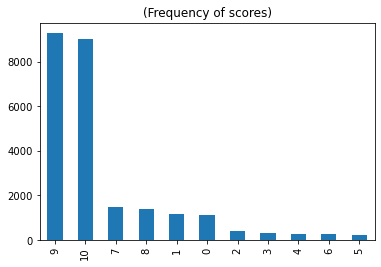

In [128]:
#Diagram (Frequency of score) shows that most of customers put high scores, 9,10. It mean that if the high score indicates
#more satisfaction, then most of customers are satisfied.

counts=df['Score'].value_counts().plot.bar()
plt.title('(Frequency of scores)')
print(counts)

AxesSubplot(0.125,0.125;0.775x0.755)


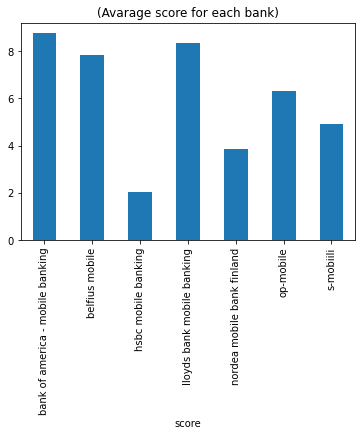

In [129]:
#Digram (Avarage score for each bank) shows that 'lloyds bank mobile banking' and bank of america - mobile banking have the
#most avarage score.

df.groupby('bank')['Score'].mean().plot.bar()
plt.title('(Avarage score for each bank)')
plt.xlabel('score')
print(counts)

In [130]:
df['Translated comment']=df['Translated comment'].apply(str)

In [131]:
# Creating a function to get the subjectivity.

#A subjectivity identification task reports a float within the range [0.0, 1.0] where 0.0 is a very objective sentence and 
#1.0 is very subjective.

def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [132]:
# Creating a function to get the polarity.
#TextBlob’s output for a polarity task is a float within the range [-1.0, 1.0] where -1.0 is a negative polarity and 1.0 is positive.

def polarity(text):
    return TextBlob(text).sentiment.polarity

In [133]:
df['subjectivity']=df['Translated comment'].apply(subjectivity)

In [134]:
df['polarity'] = df['Translated comment'].apply(polarity)

In [135]:
df.head()

,Date,Score,Translated comment,Original comment,externalId,bank,country,device,subjectivity,polarity
0,2018-09-10,9,Just very good and easy to use,Just very good and easy to use,NaN,lloyds bank mobile banking,global,android,0.806667,0.671667
1,2018-09-10,10,Quick too,Quick too,NaN,lloyds bank mobile banking,global,android,0.500000,0.333333
2,2018-09-10,10,Its much faster then laptop.,Its much faster then laptop.,NaN,lloyds bank mobile banking,global,android,0.200000,0.200000
3,2018-09-10,2,"slow, clunky. useful but poor interface","slow, clunky. useful but poor interface",NaN,lloyds bank mobile banking,global,android,0.333333,-0.133333
4,2018-09-10,9,makes my life much easier,makes my life much easier,NaN,lloyds bank mobile banking,global,android,0.200000,0.200000


In [136]:
#Create a function to compute the negative, neutral and positive analysis
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'

In [137]:
#The analysis column presents negative, positive or neutral status correspond to each raw(each comment).

df['analysis']=df['polarity'].apply(analysis)

In [138]:
df.head()

,Date,Score,Translated comment,Original comment,externalId,bank,country,device,subjectivity,polarity,analysis
0,2018-09-10,9,Just very good and easy to use,Just very good and easy to use,NaN,lloyds bank mobile banking,global,android,0.806667,0.671667,Positive
1,2018-09-10,10,Quick too,Quick too,NaN,lloyds bank mobile banking,global,android,0.500000,0.333333,Positive
2,2018-09-10,10,Its much faster then laptop.,Its much faster then laptop.,NaN,lloyds bank mobile banking,global,android,0.200000,0.200000,Positive
3,2018-09-10,2,"slow, clunky. useful but poor interface","slow, clunky. useful but poor interface",NaN,lloyds bank mobile banking,global,android,0.333333,-0.133333,Negative
4,2018-09-10,9,makes my life much easier,makes my life much easier,NaN,lloyds bank mobile banking,global,android,0.200000,0.200000,Positive


Positive    20422
Neutral      2715
Negative     1863
Name: analysis, dtype: int64


Text(0.5, 1.0, 'analysis status')

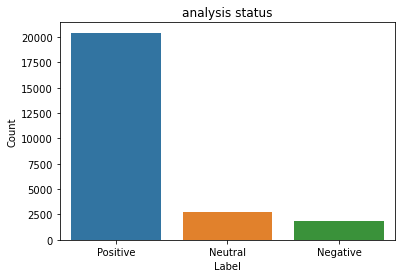

In [139]:
#Diagram "analysis status" shows that number of positive comments are more than neutral comments and the number of neutral
#comments are more than negative comments.

counts = df['analysis'].value_counts()
sns.barplot(x=counts.index, y=counts)
print(counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('analysis status')

In [140]:
df['analysis'].value_counts()

Positive    20422
Neutral      2715
Negative     1863
Name: analysis, dtype: int64

In [317]:
'''Exploratory Data Analysis

 TextAnalysis class is defined to analysis the "Translated comment".  In this class some  statistics analysis on the "Translated comment"
 are computed:
 
1. count_words: number of words in each raw of "Translated comment"
2. count_hashtags: number of tag words, preceded by a #
3. count_upper_words: number of uppercase words are sometimes used to express emotions
4. count_question: number of questions
5. count_link: number of links in the comments preceded by http(s)
6. count_emoji: number of emoji, which might be a good sign of the sentiment.

Finally we can have a look at what are the most frequent words or importance words by wordcloud and barplot. '''

'Exploratory Data Analysis\n\n TextAnalysis class is defined to analysis the "Translated comment".  In this class some  statistics analysis on the "Translated comment"\n are computed:\n \n1. count_words: number of words in each raw of "Translated comment"\n2. count_hashtags: number of tag words, preceded by a #\n3. count_upper_words: number of uppercase words are sometimes used to express emotions\n4. count_question: number of questions\n5. count_link: number of links in the comments preceded by http(s)\n6. count_emoji: number of emoji, which might be a good sign of the sentiment.\n\nFinally we can have a look at what are the most frequent words or importance words by wordcloud and barplot. '

In [141]:

class TextAnalysis:
    #def __init__(self):
     #   self.text = text
    def count_match(self, pattern,text):
        return len(re.findall(pattern,text))
    
        
    def transform(self, X):
        count_words=X.apply(lambda x: self.count_match(r'\w+', x)) 
        count_hashtags=X.apply(lambda x: self.count_match(r'#\w+', x))
        count_upper_words = X.apply(lambda x: self.count_match(r'\b[A-Z]{2,}\b', x))
        count_question = X.apply(lambda x: self.count_match(r'!|\?', x))
        count_link = X.apply(lambda x: self.count_match(r'http.?://[^\s]+[\s]?', x))
        count_emoji=X.apply(lambda x: self.count_match(re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE), x))
        data=pd.DataFrame({'count_words':count_words,'count_hashtags':count_hashtags,'count_upper_words':count_upper_words,
                          'count_question':count_question,'count_link':count_link,'count_emoji':count_emoji}) 
        return data

In [142]:
#ta is an object of class TextAnalysis
ta = TextAnalysis()
df_sentiment = ta.transform(df['Translated comment'])

In [143]:
#df_sentiment is a dataframe which presents exploratory data analysis. This consist of count_words, count_hashtags,
#count_upper_words, count_question, count_link, count_emoji and  for each comment in "Translated comment.

df_sentiment['analysis']=df['analysis']

In [144]:

df_sentiment

,count_words,count_hashtags,count_upper_words,count_question,count_link,count_emoji,analysis
0,7,0,0,0,0,0,Positive
1,2,0,0,0,0,0,Positive
2,5,0,0,0,0,0,Positive
3,6,0,0,0,0,0,Negative
4,5,0,0,0,0,0,Positive
...,...,...,...,...,...,...,...
24995,21,0,0,0,0,0,Positive
24996,1,0,0,0,0,0,Positive
24997,80,0,0,2,0,0,Negative
24998,28,0,0,1,0,0,Positive


In [145]:
df_sentiment.describe

<bound method NDFrame.describe of        count_words  count_hashtags  count_upper_words  count_question  \
0                7               0                  0               0   
1                2               0                  0               0   
2                5               0                  0               0   
3                6               0                  0               0   
4                5               0                  0               0   
...            ...             ...                ...             ...   
24995           21               0                  0               0   
24996            1               0                  0               0   
24997           80               0                  0               2   
24998           28               0                  0               1   
24999           11               0                  0               0   

       count_link  count_emoji  analysis  
0               0            0  Positive  
1  

In [146]:
#detail is a function to present details of each class (positive, negative and neutral) respect to each feature in df_sentiment.

def detail(df, col):
    print('Descriptive stats for {}'.format(col))
    print('-'*(len(col)+22))
    print(df.groupby('analysis')[col].describe())
    #bins = np.arange(df[col].min(), df[col].max() + 1)
    g = sns.FacetGrid(df, col='analysis', size=5,  margin_titles=True)
    g = g.map(plt.hist, col, bins=np.linspace(0, 40, 15))
    plt.show()
    

Descriptive stats for count_words
---------------------------------
            count       mean        std  min   25%   50%   75%    max
analysis                                                             
Negative   1863.0  30.448739  29.395986  1.0  11.0  23.0  39.0  298.0
Neutral    2715.0   9.750276   9.226749  0.0   3.0   7.0  13.0   74.0
Positive  20422.0  16.490794  18.797363  0.0   5.0  11.0  21.0  365.0


C:\Users\karimin1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


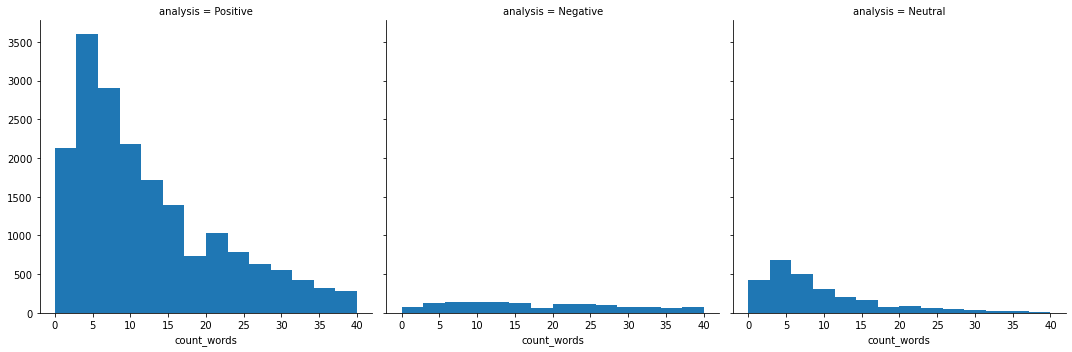

In [147]:
detail(df_sentiment,'count_words')

In [148]:
df_sentiment['count_words'].max(),df_sentiment['count_words'].min()

(365, 0)

Descriptive stats for count_hashtags
------------------------------------
            count      mean       std  min  25%  50%  75%  max
analysis                                                      
Negative   1863.0  0.002147  0.046299  0.0  0.0  0.0  0.0  1.0
Neutral    2715.0  0.002210  0.046967  0.0  0.0  0.0  0.0  1.0
Positive  20422.0  0.000735  0.030494  0.0  0.0  0.0  0.0  2.0


C:\Users\karimin1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


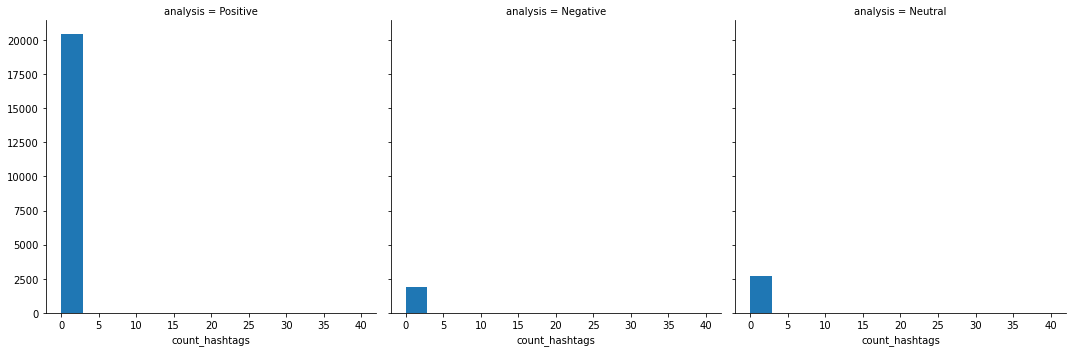

In [149]:
detail(df_sentiment,'count_hashtags')

In [150]:
df_sentiment['count_hashtags'].max()

2

Descriptive stats for count_upper_words
---------------------------------------
            count      mean       std  min  25%  50%  75%    max
analysis                                                        
Negative   1863.0  0.606012  6.192092  0.0  0.0  0.0  0.0  252.0
Neutral    2715.0  0.123389  1.217301  0.0  0.0  0.0  0.0   45.0
Positive  20422.0  0.139947  0.787619  0.0  0.0  0.0  0.0   39.0


C:\Users\karimin1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


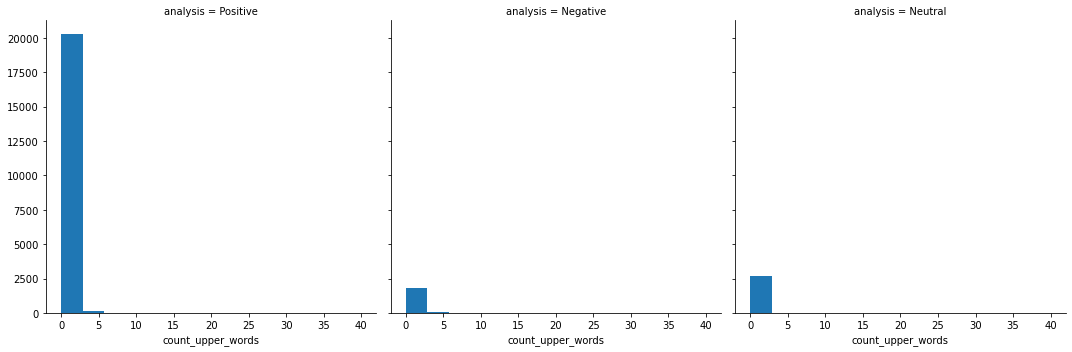

In [151]:
detail(df_sentiment,'count_upper_words')

Descriptive stats for count_question
------------------------------------
            count      mean       std  min  25%  50%  75%   max
analysis                                                       
Negative   1863.0  0.555019  1.470459  0.0  0.0  0.0  0.0  20.0
Neutral    2715.0  0.287293  0.891273  0.0  0.0  0.0  0.0  11.0
Positive  20422.0  0.477475  1.115686  0.0  0.0  0.0  0.0  18.0


C:\Users\karimin1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


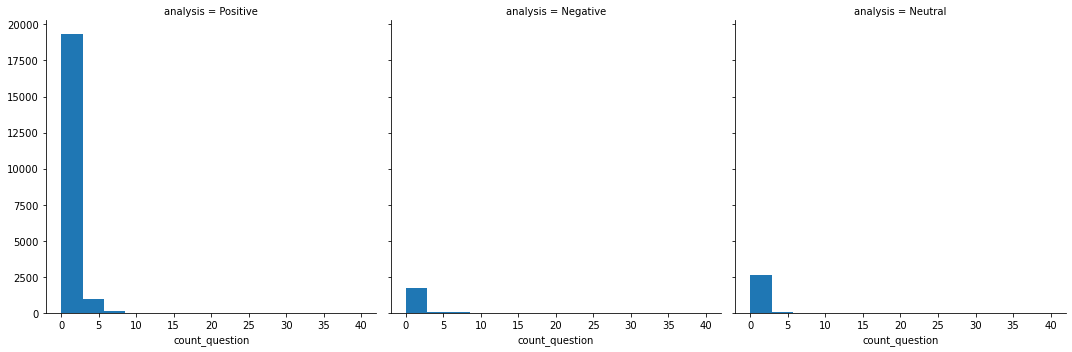

In [152]:
detail(df_sentiment,'count_question')

In [153]:
df_sentiment['count_question'].max()

20

Descriptive stats for count_link
--------------------------------
            count  mean  std  min  25%  50%  75%  max
analysis                                             
Negative   1863.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
Neutral    2715.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
Positive  20422.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0


C:\Users\karimin1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


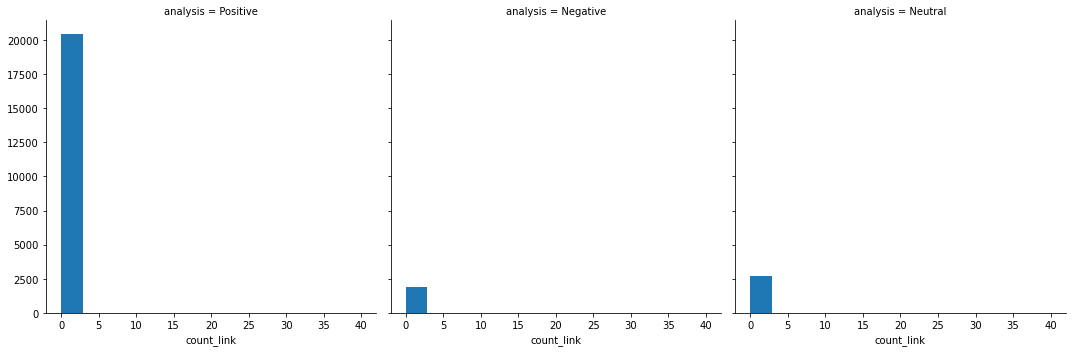

In [154]:
#"descriptive for count_link" shows that the The comments do not contain any link or URL.

detail(df_sentiment,'count_link')


In [155]:
df_sentiment['count_link'].max()

0

Descriptive stats for count_emoji
---------------------------------
            count      mean       std  min  25%  50%  75%  max
analysis                                                      
Negative   1863.0  0.018787  0.154319  0.0  0.0  0.0  0.0  2.0
Neutral    2715.0  0.041621  0.232173  0.0  0.0  0.0  0.0  2.0
Positive  20422.0  0.032416  0.192476  0.0  0.0  0.0  0.0  4.0


C:\Users\karimin1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


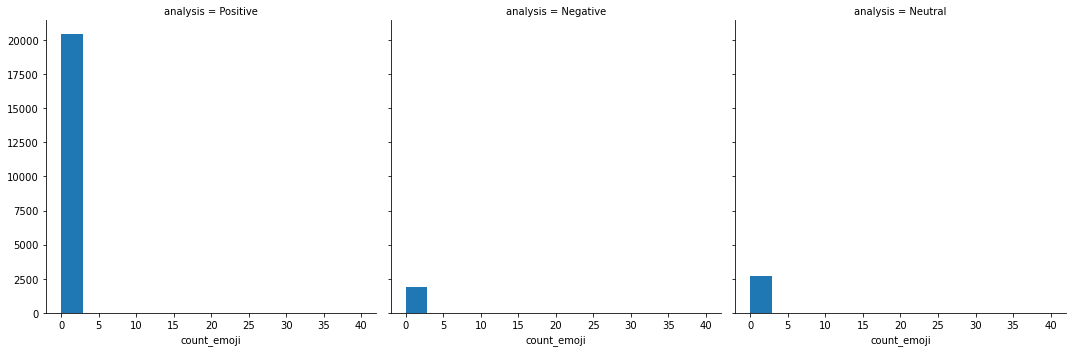

In [156]:
detail(df_sentiment,'count_emoji')

In [157]:
df_sentiment['count_emoji'].max()

4

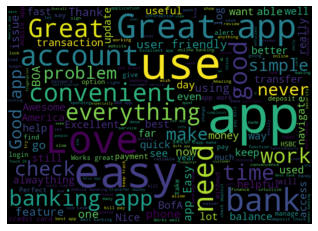

In [158]:
# Visualization of frequency or importance of words in comments by WordCloud. The wordcloud shows that importance words are:
#app, Great, easy, ...

allWords = ' '.join([w for w in df['Translated comment']])
wordCloud = WordCloud( width=700, height=500, random_state=21, max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation= "bilinear")
plt.axis('off')
plt.show()

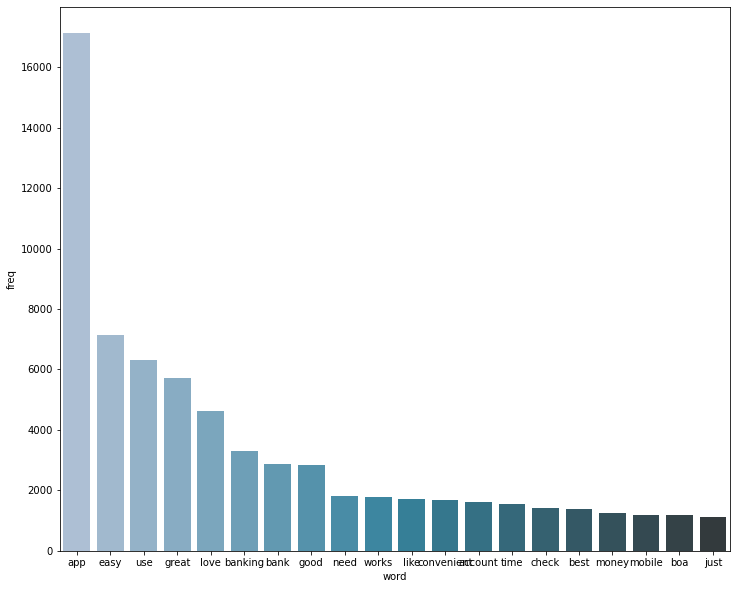

In [159]:
count_vector = CountVectorizer(analyzer= 'word', stop_words='english')
count_vector.fit(df['Translated comment'])
col=count_vector.transform(df['Translated comment'])

word_freq = dict(zip(count_vector.get_feature_names(), np.asarray(col.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(12, 10))
bar_freq_word = sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

In [736]:
'''Conclusions on text exploration:
    
    I have created a DataFrame based on statistical analysis on Translated comment and analysis column which I had created in
    the previous step. There are three class labels to predict: negative, neutral, or positive.
        
    Word count: The number of words in the comment that has the most words is 365. On the other hands there are some comments
    that have just one or two words. It means that we have to be careful during data cleaning not to remove too many words. 
    Positive comments include more words than negative or natural comments. The number of words in negative comments is less 
    than positive and neutral.
        
    Hashtag count: Most of the comments do not contain hash tags. The average of hashtags in neutral comments (0.002210) is 
    more than negative comments(0.002147). Moreover the average of hashtags in positive comments is (0.000735).
        
    Upper words count: Sometimes customers use Upper-case words for more emphasis, especially for negative feedback. The 
        analysis of data shows that the average number of upper-case words in negative comments is more than positive and then 
        natural comments. 
        
    Question and exclamation count: The negative comments contain a bit more exclamation or question marks. After negative
    comments, positive comments have more exclamation or question marks. Neutral comments have lowest questions and exclamations.    
        
    Link count: There are no links or http in comments, so we don't need to remove the URL address in the cleaning process.
        
    emoji count:  Descriptive stats for count_emoji shows customers use emojis in their comments. The number of emojis in 
                  positive comments are more than the number of emojis in neutral and then negative comments. 


    Moreover,  a look at wordcloud and barplot shows the most frequent words are app, easy, use, greate,...respectively. ''' 
   

"Conclusions:\n    \n    I have created a DataFrame based on statistic analysis on Translated comment and analysis column which I had created in\n    the previous step. There are three class labels to predict: negative, neutral, or positive.\n        \n    Word count: The number of words in the comment that has the most words is 365. On the other hands there are some comments\n        that have just one or two words. It means that we have to be careful during data cleaning not to remove too many words.\n        Positive comments include more words than negative or natural comments. The number of words in negative comments is the\n        lowest.\n        \n    Hashtag count: Most of the comments do not contain hash tags. The avarage of hashtags in netural comments (0.002210) is more\n        than negative comments(0.002147). Moreover the avarage of hashtags in positive comments is (0.000735).\n        \n    Upper words count: Sometimes customers use Upper-case words for more emphasis, 

In [ ]:
'''Data cleaning:

1. removeing the  sign (#). As we see in the data exploration a few comments have used#.
2. converting all words to lowercase.
3. removeing all punctuations (? !, : ;... )
4. removeing numbers
5. removeing stopwords
6. Useing PorterStemmer to keep the stem of the words

Data exploration shows that comments do not contain URL, so we don't need a cleaning step for them.
'''

In [160]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karimin1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [161]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [162]:
class clean_text:
    #def __init__(self):
     #   self.text = text
        
    #removing emoji    
    def remove_emoji(self,text):
        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
        
     #removing punctuations   
    def remove_punctuations(self,text):
        exclude = set(string.punctuation)
        result = ''.join(ch for ch in text if ch not in exclude)
        return result
    
      #tokenization
    #def tokenizer(self,text):
       # result=nltk.word_tokenize(text)
       # return result
    
      #removing stopwords
        
    def stop_word(self,text):
        stopword=set(stopwords.words('english'))
        words = text.split() 
        clean_words = [word for word in words if (word not in stopword) and len(word) > 1]
        result=" ".join(clean_words) 
        return result
    
      #removing numbers
    def remove_numbers(self,text):
        result = ''.join(c for c in text if not c.isdigit())
        return result
      
      #converting to lower letter
    def lower_letter(self,text):
        result=''.join(word.lower() for word in text)
        return result
    
      ##stemming
    def stemmer(self,text):
        porter = PorterStemmer()
        words = text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        result=" ".join(stemmed_words)
        return result
    
    #def lemmatizer(self,text):
      #  result=[lemmitizer.lemmatize(word) for word in text]
      #  return result
    
    def transform(self,text):
        result=text.apply(self.remove_emoji).apply(self.remove_punctuations).apply(self.remove_numbers).apply(self.stemmer).apply(self.stop_word)
        return result
    
    def top_transform(self,text):
        result=text.apply(self.remove_punctuations).apply(self.stemmer)
        return result
    
    def pre_process(self,text):
        result=text.apply(self.stop_word)
        return result

In [163]:
#ct is an object of class clean_text and using transform function we can apply cleaning steps on Translated comment.

ct=clean_text()

In [164]:
ct.transform(df['Translated comment'])

0                                       veri good easi use
1                                                    quick
2                                       much faster laptop
3                            slow clunki use poor interfac
4                                    make life much easier
                               ...                        
24995    quick effect especi fingerprint reader passwor...
24996                                                great
24997    trash complet trash app take forev load everyt...
24998    save trip bank love thi app everyth right phon...
24999      veri use cash check phone make life much easier
Name: Translated comment, Length: 25000, dtype: object

In [165]:
#clean_data column is a new column that presents comments after the cleaning process.

df['clean_data']=ct.transform(df['Translated comment'])

In [166]:
df.head()

,Date,Score,Translated comment,Original comment,externalId,bank,country,device,subjectivity,polarity,analysis,clean_data
0,2018-09-10,9,Just very good and easy to use,Just very good and easy to use,NaN,lloyds bank mobile banking,global,android,0.806667,0.671667,Positive,veri good easi use
1,2018-09-10,10,Quick too,Quick too,NaN,lloyds bank mobile banking,global,android,0.500000,0.333333,Positive,quick
2,2018-09-10,10,Its much faster then laptop.,Its much faster then laptop.,NaN,lloyds bank mobile banking,global,android,0.200000,0.200000,Positive,much faster laptop
3,2018-09-10,2,"slow, clunky. useful but poor interface","slow, clunky. useful but poor interface",NaN,lloyds bank mobile banking,global,android,0.333333,-0.133333,Negative,slow clunki use poor interfac
4,2018-09-10,9,makes my life much easier,makes my life much easier,NaN,lloyds bank mobile banking,global,android,0.200000,0.200000,Positive,make life much easier


In [167]:
#converting categorical labels to integers: Given that labels are the categorical type and Ml algorithms can work by numeric
#data, so I will convert them into the numeric format. I use LabelEncoder() to convert labels into numeric data. 

df['number_analysis']=LabelEncoder().fit_transform(df['analysis'])

In [168]:
df.head()

,Date,Score,Translated comment,Original comment,externalId,bank,country,device,subjectivity,polarity,analysis,clean_data,number_analysis
0,2018-09-10,9,Just very good and easy to use,Just very good and easy to use,NaN,lloyds bank mobile banking,global,android,0.806667,0.671667,Positive,veri good easi use,2
1,2018-09-10,10,Quick too,Quick too,NaN,lloyds bank mobile banking,global,android,0.500000,0.333333,Positive,quick,2
2,2018-09-10,10,Its much faster then laptop.,Its much faster then laptop.,NaN,lloyds bank mobile banking,global,android,0.200000,0.200000,Positive,much faster laptop,2
3,2018-09-10,2,"slow, clunky. useful but poor interface","slow, clunky. useful but poor interface",NaN,lloyds bank mobile banking,global,android,0.333333,-0.133333,Negative,slow clunki use poor interfac,0
4,2018-09-10,9,makes my life much easier,makes my life much easier,NaN,lloyds bank mobile banking,global,android,0.200000,0.200000,Positive,make life much easier,2


In [169]:
df['number_analysis'].unique()

array([2, 0, 1])

In [ ]:
'''Given that ML algorithms work with numeric data, we should convert text data into numeric data.There are two major approaches

1. Count Vectorization
2. TF-IDF Vectorization

The count vectorization takes all words in all comments, assigns an ID and counts the frequency of the word per comment. One 
issue with CountVectorizer is that there might be words that occur frequently in observations of the target classes. These words
can be removed since they do not have discriminatory information. TF-IDF vectorization can be used to downweight these frequent
words. I use both techniques count vectorization technique and then TF-IDF vectorization and compare the result of classification 
models when text are converted by them.

A function which is termed model_function, is defined to compare the accuracy of different models (LogisticRegression,
DecisionTreeClassifier, SVM, RandomForest ).
'''

In [173]:
df['clean_data'].isnull().count()

25000

In [174]:
#Some of comments contain just one or two words, so we should deal with some empty raws and their content has been removed in
#by removing stop_words. I have considered an approch that replace empty raws by a text, ['removed text']


empty_clean = df['clean_data']== ''
print('{} records have no words left after text cleaning'.format(df['clean_data'][empty_clean].count()))


63 records have no words left after text cleaning


In [177]:
df['clean_data'].loc[empty_clean] = '[removerd text]'

In [50]:
# Single Validation: Creating test data:

#Given that evaluation of the trained model on the training set is not correct, we need another set which is termed test set to 
#evaluate the model. df['clean_data'] will be splited into train and test sets by train_test_split() function.

X_train,X_test,y_train,y_test=train_test_split(df['clean_data'],df['number_analysis'],test_size=0.3,random_state=0)

In [51]:
countvectorizer = CountVectorizer(analyzer= 'word')
countvectorizer.fit(df['clean_data'])

CountVectorizer()

In [52]:
X_train_count_vector=countvectorizer.transform(X_train)
X_test_count_vector=countvectorizer.transform(X_test)

In [181]:
# model function presents the accuracy of models and helps to choose the best model.

def model_function(classifier,training_set,label,test_set):
    
    # fit the training dataset on the classifier
    classifier.fit(training_set,label)
    
    # predict the labels on validation dataset
    predictions=classifier.predict(test_set)
    #target_names = ['0', '1', '2']
    
    return metrics.accuracy_score(predictions, y_test) # Also we can use classification_report for getting recall, precision, F1

In [182]:
regression1=model_function(linear_model.LogisticRegression(), X_train_count_vector,y_train, X_test_count_vector)

C:\Users\karimin1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [183]:

print(regression1)

0.9368


In [184]:
DecisionTree1=model_function(DecisionTreeClassifier(),X_train_count_vector,y_train,X_test_count_vector)

In [185]:
print(DecisionTree1)

0.9173333333333333


In [186]:
svm1=model_function(LinearSVC(),X_train_count_vector,y_train,X_test_count_vector)

C:\Users\karimin1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [187]:

print(svm1)

0.9406666666666667


In [188]:
random_forest1=model_function(RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42),
                        X_train_count_vector,y_train,X_test_count_vector)
print(random_forest1)

0.9038666666666667


In [189]:
#converting text by TF-IDF technique. I will implement ML models for converted text by TF-IDF and then compare the results
#with the countvectorizer



tfidf=TfidfVectorizer(analyzer= 'word')
tfidf.fit(df['clean_data'])

TfidfVectorizer()

In [190]:
X_train_tfidf=tfidf.transform(X_train)

In [191]:

X_test_tfidf=tfidf.transform(X_test)

In [192]:
regression2=model_function(linear_model.LogisticRegression(), X_train_tfidf,y_train, X_test_tfidf)

C:\Users\karimin1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [193]:
print(regression2)

0.9245333333333333


In [194]:
DecisionTree2=model_function(DecisionTreeClassifier(),X_train_tfidf,y_train,X_test_tfidf)

In [195]:
print(DecisionTree2)

0.9066666666666666


In [196]:
svm2=model_function(LinearSVC(),X_train_tfidf,y_train,X_test_tfidf)

In [197]:
print(svm2)

0.9368


In [198]:
random_forest2=model_function(RandomForestClassifier(),
                        X_train_tfidf,y_train,X_test_tfidf)
print(random_forest2)

0.9113333333333333


In [ ]:
'''Conclusion:
         I have considered four classifiers to classify the content of comments into positive, neutral, and negative comments.
         The classifier models were, LogisticRegression,DecisionTreeClassifier, SVM, RandomForest. These models are compared 
         based on their accuracy.  
         
        
        The following DataFrame show that when text data are converted into numeric data by CountVectorizer we have better 
        performace.The best performance on the test set comes from the Support vector machine(SVM) and Logistic regression
        with features from countVectorizer'''

In [199]:
data={'LogisticRegression':[regression1,regression2],'DecisionTree':[DecisionTree1,DecisionTree2],
     'SuppoerVectorMachine':[svm1,svm2],'RandomForest':[random_forest1,random_forest2]}
conclusion = pd.DataFrame(data, index=['countVectorizer','TF-IDF'])

print (conclusion)

                 LogisticRegression  DecisionTree  SuppoerVectorMachine  \
countVectorizer            0.936800      0.917333              0.940667   
TF-IDF                     0.924533      0.906667              0.936800   

                 RandomForest  
countVectorizer      0.903867  
TF-IDF               0.911333  


In [200]:
regression_model=linear_model.LogisticRegression().fit( X_train_count_vector,y_train)

C:\Users\karimin1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [201]:
print(regression_model.intercept_)

[-1.39389517  1.48936534 -0.09547017]


In [202]:
print(regression_model.coef_)

[[-2.52989181e-06  0.00000000e+00 -9.32945927e-06 ... -2.66831440e-05
  -2.66831440e-05 -2.66831440e-05]
 [-2.22506444e-06  0.00000000e+00 -1.04966624e-05 ... -8.16230146e-06
  -8.16230146e-06 -8.16230146e-06]
 [ 4.75495625e-06  0.00000000e+00  1.98261217e-05 ...  3.48454455e-05
   3.48454455e-05  3.48454455e-05]]


In [75]:
y_prediction=regression_model.predict(X_test_count_vector)

In [76]:
y_prediction.shape , y_test.shape

((7500,), (7500,))

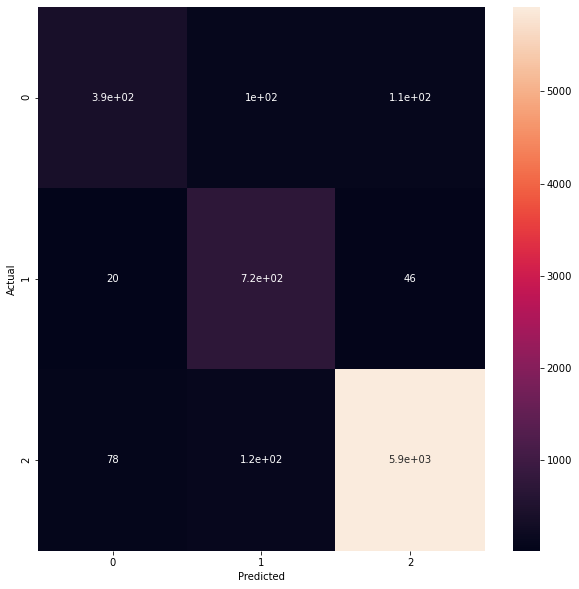

In [77]:
#Let's look at the confusion matrix for the validation data.


from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_prediction)
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(conf_mat, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
'''keyword extraction'''

In [78]:
#A new object is created by the clean_text class and I will remove stopwords before extracting keywords.

cd=clean_text()
clean_data=cd.pre_process(df['Translated comment'])

In [79]:
clean_data

0                                       Just good easy use
1                                                    Quick
2                                  Its much faster laptop.
3                      slow, clunky. useful poor interface
4                                   makes life much easier
                               ...                        
24995    Quick effective, especially fingerprint reader...
24996                                                Great
24997    Trash. Complete trash app. Takes forever load ...
24998    Saves trip bank. Love app everything right pho...
24999    Very useful. Cashing checks phone makes life m...
Name: Translated comment, Length: 25000, dtype: object

In [80]:
key_word_extractor=yake.KeywordExtractor()
def get_keywords_yake(idx, text):
    y = yake.KeywordExtractor(lan='en',          # language
                             n = 3,              # n-gram size
                             dedupLim = 0.9,     # deduplicationthresold
                             dedupFunc = 'seqm', #  deduplication algorithm
                             windowsSize = 1,
                             top = 10,           # number of keys
                             features=None)           
    
    keywords = y.extract_keywords(text)
    return keywords


In [81]:
#keywords in the first comment.  We can see keywords that are words with the most scores.

idx=0
keywords = get_keywords_yake(idx, clean_data[idx])
print(idx, keywords, clean_data[idx])

0 [('good easy', 0.09700399286574239), ('good', 0.29736558256021506), ('easy', 0.29736558256021506)] Just good easy use


In [213]:
'''Another way to extract keywords will be done by TF-IDF technique.'''

text_data=df.clean_data.values.tolist()

In [214]:
#create a vocabulary of words by countvectorizer 

count_vector=CountVectorizer(max_df=0.95,         # ignore words that appear in 95% of documents
                   max_features=10000,  # the size of the vocabulary
                   ngram_range=(1,3)    # vocabulary contains single words, bigrams, trigrams
                  )
word_count_vect=count_vector.fit_transform(text_data)

In [215]:
#shape of vocabulary is (25000,10000), it means that the number of unique words is 10000 except that stopwords. Also there are
#25000 text in Translated comment column.

word_count_vect.shape

(25000, 10000)

In [216]:
# Here we are taking sparse matrix from countvetrorizer to generate IDF

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) #use_idf enable inverse-document-frequency reweighting.
tfidf_transformer.fit(word_count_vect)

TfidfTransformer()

In [ ]:
#Computing TF-IDF and Extracting Keywords: After computing IDF, Once we have our IDF computed,  TF-IDF is computed and extract 
#the top keywords. Using the tf-idf weighting scheme, the keywords are the words with the higherst TF-IDF score.


In [217]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

In [218]:

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        fname = feature_names[idx]
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
        #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [219]:
feature_names=count_vector.get_feature_names()

In [220]:
def get_keywords(idx, docs):

    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(count_vector.transform([docs[idx]]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo()) #convert tf-idf-vector to coordinate format

    #extract only the top n; n here is 10
    keywords=extract_topn_from_vector(feature_names,sorted_items,10)
    
    return keywords

In [221]:
def print_results(idx,keywords, df):
    # now print the results
    print("\n===Keywords===")
    for k in keywords:
        print(k,keywords[k])

In [222]:
idx=0
keywords=get_keywords(idx, text_data)
print_results(idx,keywords, text_data)


===Keywords===
veri good easi 0.525
good easi use 0.489
good easi 0.458
veri good 0.33
good 0.218
easi use 0.194
veri 0.185
easi 0.157
use 0.147


In [223]:
#Finding keyword in Translated comment column.
data1=df['Translated comment'].tolist()

In [224]:
idx=0
keywords=get_keywords(idx, data1)
print_results(idx,keywords, data1)


===Keywords===
good 0.828
use 0.56


In [ ]:
'''collocation'''

In [225]:
text = nltk.Text(nltk.corpus.df['Translated comment'].words())

AttributeError: module 'nltk.corpus' has no attribute 'df'